<a href="https://colab.research.google.com/github/IbrahimHammed/MachineLearning/blob/main/RBSN_Demo_KNN_Example_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevant library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data from url
url = 'https://github.com/IbrahimHammed/MachineLearning/blob/main/SocialNetworkAds%20(1).csv?raw=true'
df = pd.read_csv(url)

In [3]:
# Review the first 5 records
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Get general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Independent Variables**

In [6]:
# Extract predictors
x = df.iloc[:, [2,3]].values

In [7]:
# Extract predicted/target variable
y = df.iloc[:, 4].values

In [8]:
# Split dataset into 4 components
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [9]:
# Features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
# Create model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)

In [24]:
# Train Model
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predict Test Results**

In [25]:
# Make predictions using test data
y_pred = classifier.predict(x_test)

<ipython-input-26-a89c80c5f2f1>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


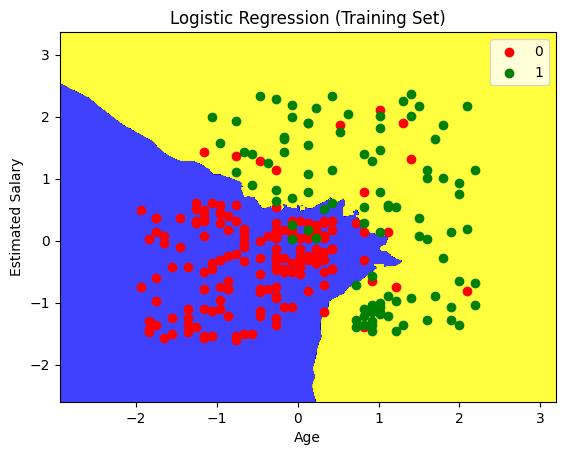

In [26]:
# Visualise training results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
#

<ipython-input-15-cd507e9f06ff>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


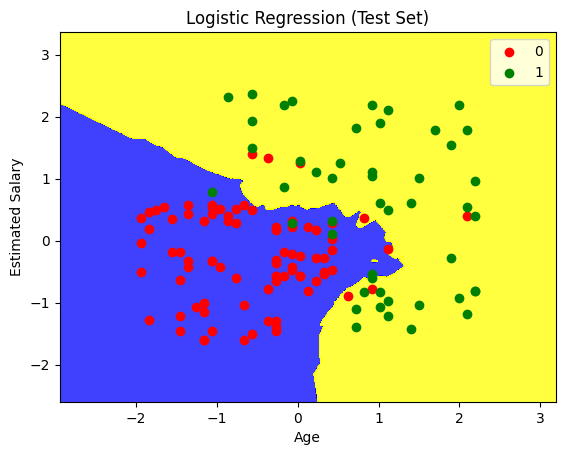

In [15]:
# Visualize test results
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Model Evaluation**

In [20]:
# Model valuation
from sklearn.metrics import confusion_matrix, accuracy_score
accuracyScore = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)
cm

array([[77,  7],
       [ 6, 42]])

In [22]:
accuracyScore

90.15151515151516